### Data Exploration and Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
dataset = pd.read_csv("dataset/Dataset.csv") 

# Display the first 5 rows to preview the data
print("Dataset Head:")
dataset.head()

Dataset Head:


,Customer_ID,Name,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,CUST0001,Customer_1,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing! Highly recommended. *&,11,NaN,High
1,CUST0002,Customer_2,24.0,68414.99,High School,NaN,Chicago,"Decent quality, but shipping took too long. ##*",17,Books,Low
2,CUST0003,Customer_3,66.0,93824.94,High School,Engineer,Los Angeles,"It's okay, not the best, but does the job. %!",2,Toys,Low
3,CUST0004,Customer_4,31.0,39551.43,PhD,Engineer,Houston,Great product! Would definitely buy again. ~^#,29,NaN,Low
4,CUST0005,Customer_5,19.0,41216.05,Bachelor,Teacher,New York,"Decent quality, but shipping took too long. $#&",16,Clothing,Medium


In [3]:
# Display detailed information about the DataFrame structure and missing values
print("Dataset Info:\n")
print(dataset.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         1000 non-null   object 
 1   Name                1000 non-null   object 
 2   Age                 950 non-null    float64
 3   Annual_Income       950 non-null    float64
 4   Education_Level     950 non-null    object 
 5   Occupation          950 non-null    object 
 6   City                1000 non-null   object 
 7   Customer_Reviews    950 non-null    object 
 8   Purchase_Frequency  1000 non-null   int64  
 9   Product_Category    950 non-null    object 
 10  Target_Variable     1000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB
None


In [4]:
# Drop unnecessary columns: "Customer_ID" and "Name", as these columns will be of no use.
dataset = dataset.drop(["Customer_ID", "Name"], axis=1).copy()

In [5]:
# Function to check whether there is outlier or not
def outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = outliers.shape[0]

    print(f"Number of outliers in '{column}': {num_outliers}")

In [6]:
outliers_iqr(df = dataset, column = "Annual_Income")
outliers_iqr(df = dataset, column = "Age")

Number of outliers in 'Annual_Income': 0
Number of outliers in 'Age': 0


In [7]:
# Define column groups based on data types
numeric_cols = ["Age", "Annual_Income"]
categorical_cols = ["Education_Level", "Occupation", "Product_Category"]
text_cols = ["Customer_Reviews"]

In [8]:
# Function for filling the data
from sklearn.impute import SimpleImputer

In [9]:
# Impute numeric columns using the mean strategy
num_imputer = SimpleImputer(strategy = "mean")
dataset[numeric_cols] = num_imputer.fit_transform(dataset[numeric_cols])

In [10]:
dataset[categorical_cols] = dataset[categorical_cols].fillna("UNK")

In [11]:
# Removing rows with NaN values in 'Customer_Reviews' to maintain data integrity. 
# Filling them randomly could introduce noise, potentially misclassifying sentiment (e.g., a negative review could be labeled as high or medium satisfaction).
dataset = dataset[~dataset["Customer_Reviews"].isna()]

In [12]:
# Verify that missing values are handled
print("\nMissing values after imputation:")
print(dataset.isnull().sum())


Missing values after imputation:
Age                   0
Annual_Income         0
Education_Level       0
Occupation            0
City                  0
Customer_Reviews      0
Purchase_Frequency    0
Product_Category      0
Target_Variable       0
dtype: int64


In [13]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing! Highly recommended. *&,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,"Decent quality, but shipping took too long. ##*",17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,"It's okay, not the best, but does the job. %!",2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,Great product! Would definitely buy again. ~^#,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,"Decent quality, but shipping took too long. $#&",16,Clothing,Medium


In [14]:
import re

def clean_text(text):

    # Remove non-alphabetic characters and ASCII codes
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [15]:
# Apply the cleaning function to the "text" column
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].apply(clean_text)
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,Amazing Highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,Decent quality but shipping took too long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,Its okay not the best but does the job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,Great product Would definitely buy again,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,Decent quality but shipping took too long,16,Clothing,Medium


In [16]:
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].str.lower()
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,amazing highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,decent quality but shipping took too long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,its okay not the best but does the job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,great product would definitely buy again,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,decent quality but shipping took too long,16,Clothing,Medium


In [17]:
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Get English stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

# Apply the stopwords removal function
dataset["Customer_Reviews"] = dataset["Customer_Reviews"].apply(remove_stopwords)
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,64.0,77964.61,Bachelor,Engineer,Phoenix,amazing highly recommended,11,UNK,High
1,24.0,68414.99,High School,UNK,Chicago,decent quality shipping took long,17,Books,Low
2,66.0,93824.94,High School,Engineer,Los Angeles,okay best job,2,Toys,Low
3,31.0,39551.43,PhD,Engineer,Houston,great product would definitely buy,29,UNK,Low
4,19.0,41216.05,Bachelor,Teacher,New York,decent quality shipping took long,16,Clothing,Medium


In [19]:
# Packages for scaling and Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [20]:
# List all numeric features including "Purchase_Frequency"
numeric_features = ["Age", "Annual_Income", "Purchase_Frequency"]

# Initialising the scaler
scaler = StandardScaler()

# Fitting and transforming
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

In [21]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,1.407629,0.277447,Bachelor,Engineer,Phoenix,amazing highly recommended,-0.501476,UNK,High
1,-1.230054,-0.066076,High School,UNK,Chicago,decent quality shipping took long,0.193663,Books,Low
2,1.539513,0.847982,High School,Engineer,Los Angeles,okay best job,-1.544184,Toys,Low
3,-0.768460,-1.104369,PhD,Engineer,Houston,great product would definitely buy,1.583941,UNK,Low
4,-1.559765,-1.044489,Bachelor,Teacher,New York,decent quality shipping took long,0.077807,Clothing,Medium


In [22]:
# To check different values in "Education_Level"
dataset["Education_Level"].unique()

array(['Bachelor', 'High School', 'PhD', 'Master', 'UNK'], dtype=object)

In [23]:
# Encode the ordinal feature "Education_Level"
education_order = {
    "UNK": 0,
    "High School": 1,
    "Bachelor": 2,
    "Master": 3,
    "PhD": 4
}

# Applying the encoding
dataset["Education_Level"] = dataset["Education_Level"].map(education_order)

In [24]:
dataset.head()

,Age,Annual_Income,Education_Level,Occupation,City,Customer_Reviews,Purchase_Frequency,Product_Category,Target_Variable
0,1.407629,0.277447,2,Engineer,Phoenix,amazing highly recommended,-0.501476,UNK,High
1,-1.230054,-0.066076,1,UNK,Chicago,decent quality shipping took long,0.193663,Books,Low
2,1.539513,0.847982,1,Engineer,Los Angeles,okay best job,-1.544184,Toys,Low
3,-0.768460,-1.104369,4,Engineer,Houston,great product would definitely buy,1.583941,UNK,Low
4,-1.559765,-1.044489,2,Teacher,New York,decent quality shipping took long,0.077807,Clothing,Medium


In [25]:
# One-hot encode categorical features
dataset_encoded = pd.get_dummies(dataset, columns=["Occupation", "City", "Product_Category"], drop_first = True)

In [26]:
# Convert only numeric columns to float
numeric_columns = dataset_encoded.select_dtypes(include=[np.number]).columns
dataset_encoded[numeric_columns] = dataset_encoded[numeric_columns].astype(np.float64)

In [27]:
# Convert boolean columns to 1 (True) and 0 (False)
dataset_encoded = dataset_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))

C:\Users\rahul\AppData\Local\Temp\ipykernel_30848\2380828249.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_encoded = dataset_encoded.applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [28]:
dataset_encoded.head()

,Age,Annual_Income,Education_Level,Customer_Reviews,Purchase_Frequency,Target_Variable,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Scientist,...,Occupation_UNK,City_Houston,City_Los Angeles,City_New York,City_Phoenix,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Toys,Product_Category_UNK
0,1.407629,0.277447,2.0,amazing highly recommended,-0.501476,High,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.230054,-0.066076,1.0,decent quality shipping took long,0.193663,Low,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.539513,0.847982,1.0,okay best job,-1.544184,Low,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,-0.768460,-1.104369,4.0,great product would definitely buy,1.583941,Low,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,-1.559765,-1.044489,2.0,decent quality shipping took long,0.077807,Medium,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [29]:
dataset = dataset_encoded.copy()

In [30]:
# Encode the target variable using LabelEncoder
le = LabelEncoder()

dataset["Target"] = le.fit_transform(dataset["Target_Variable"])

dataset.drop("Target_Variable", axis = 1, inplace = True)

In [31]:
dataset.head()

,Age,Annual_Income,Education_Level,Customer_Reviews,Purchase_Frequency,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Scientist,Occupation_Teacher,...,City_Houston,City_Los Angeles,City_New York,City_Phoenix,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Home Appliances,Product_Category_Toys,Product_Category_UNK,Target
0,1.407629,0.277447,2.0,amazing highly recommended,-0.501476,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-1.230054,-0.066076,1.0,decent quality shipping took long,0.193663,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.539513,0.847982,1.0,okay best job,-1.544184,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,-0.768460,-1.104369,4.0,great product would definitely buy,1.583941,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,-1.559765,-1.044489,2.0,decent quality shipping took long,0.077807,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,2


In [32]:
glove_embeddings = {}

with open("Embeddings/glove.6B.100d.txt", "r", encoding="utf-8") as file:
    for line in file:
        values = line.split()
        word = values[0]
        embedding = np.array(values[1:], dtype=np.float64)
        glove_embeddings[word] = embedding

In [33]:
# Function to get the mean GloVe embedding of a review
def get_mean_embedding(review, glove_embeddings):
    tokens = review.split()  # Tokenize by spaces
    embeddings = []
    
    for token in tokens:
        if token in glove_embeddings:
            embeddings.append(glove_embeddings[token])
    
    if embeddings:
        return np.mean(embeddings, axis=1)  # Mean of embeddings
    else:
        return np.zeros(100)  # Return a zero vector if no valid embeddings

In [34]:
from collections import Counter

In [35]:
# Create vocab from the "Customer_Reviews" column
def create_vocab_from_column(df, column_name):
    all_words = []
    for text in df[column_name]:
        words = str(text).split()  # Split text by spaces
        all_words.extend(words)  # Add words to the list
    word_counts = Counter(all_words)  # Count word frequencies
    return list(word_counts.keys())  # Return vocab list

In [36]:
# Generate the vocabulary list
vocab_list = create_vocab_from_column(dataset, "Customer_Reviews")

# Initialize the DataFrame to store the embeddings
embedding_df = pd.DataFrame(0.0, index=np.arange(len(dataset)), columns=vocab_list)

In [37]:
for idx, review in enumerate(dataset["Customer_Reviews"]):
    words = review.split()
    for word in words:
        embedding_df.at[idx, word] += get_mean_embedding(word, glove_embeddings)

In [38]:
embedding_df.head()

,amazing,highly,recommended,decent,quality,shipping,took,long,okay,best,...,terrible,experience,never,shopping,expected,could,better,love,perfect,needs
0,0.031266,-0.044214,-0.102721,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,-0.015411,-0.030045,0.00199,-0.036295,0.000147,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.003817,-0.005407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,-0.015411,-0.030045,0.00199,-0.036295,0.000147,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
embedding_df.shape

(950, 37)

In [40]:
dataset.drop("Customer_Reviews", axis = 1, inplace = True)

In [41]:
final_df = pd.concat([dataset, embedding_df], axis = 1)

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996 entries, 0 to 931
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               950 non-null    float64
 1   Annual_Income                     950 non-null    float64
 2   Education_Level                   950 non-null    float64
 3   Purchase_Frequency                950 non-null    float64
 4   Occupation_Doctor                 950 non-null    float64
 5   Occupation_Engineer               950 non-null    float64
 6   Occupation_Lawyer                 950 non-null    float64
 7   Occupation_Scientist              950 non-null    float64
 8   Occupation_Teacher                950 non-null    float64
 9   Occupation_UNK                    950 non-null    float64
 10  City_Houston                      950 non-null    float64
 11  City_Los Angeles                  950 non-null    float64
 12  City_New York

In [43]:
X = final_df.drop("Target", axis = 1)
y = final_df["Target"]

In [46]:
len(y)

996

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training (80%) and testing (20%) sets, preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define multiple classification models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Store results for comparison
results = {}

# Train each model and output performance metrics
for model_name, model in models.items():
    print(f"\n{'='*10} Training {model_name} {'='*10}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy  # Store accuracy for comparison

    # Display results
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    
# Print final accuracy comparison
print("\n\n=== Model Performance Comparison ===")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")


ValueError: Input y contains NaN.


Best parameters for Random Forest:
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}

Training Accuracy: 0.5605
Test Accuracy: 0.3526


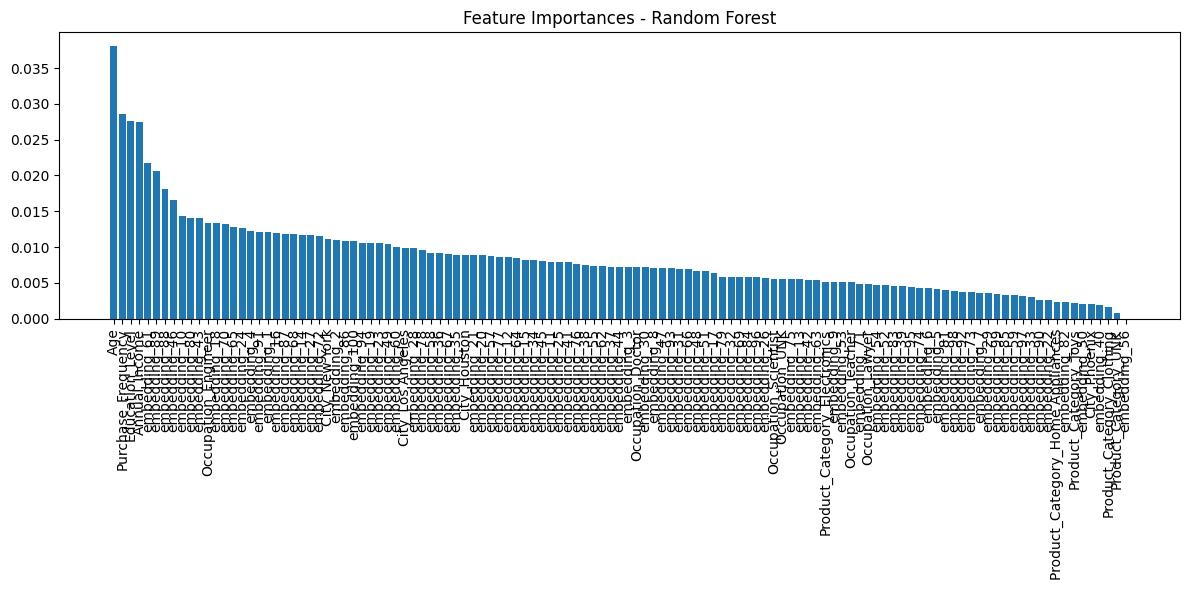

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for Random Forest.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV for Random Forest.
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters.
print("\nBest parameters for Random Forest:")
print(grid_search.best_params_)

# Extract the best estimator.
best_rf = grid_search.best_estimator_

# Evaluate accuracy on training and test sets.
train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, best_rf.predict(X_test))

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Visualize feature importances.
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns  # Ensure you're using the correct feature names

plt.figure(figsize=(12, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()